In [1]:
import os
from pathlib import Path
from typing import Any, Dict, List, Tuple, Union
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
#plt.rcParams['text.usetex'] = False
#matplotlib.rc('axes', edgecolor='grey')

In [2]:
os.chdir(os.path.split(os.getcwd())[0]) # set working directory to Molli top level

import ase_utils as au
from dataset import Dataset
import features as ft
import utils as ut
import molecule_analyzer as A

#colours = list(matplotlib.colors.TABLEAU_COLORS.values())
colours = ["red","royalblue","limegreen","saddlebrown","orange","cyan","yellow","black","grey"]

In [3]:
mol24_interesting_features = [
  ft.Angle("angle Ti(7)-O(6)-C(4)", 7-1, 6-1, 4-1),
  ft.Angle("angle Ti(7)-O(20)-C(18)", 7-1, 20-1, 18-1),
  ft.Angle("angle Ti(61)-O(56)-C(48)", 61-1, 56-1, 48-1),
  ft.Angle("angle Ti(61)-O(59)-C(54)", 61-1, 59-1, 54-1),
  ft.Angle("angle Ti(7)-O(8)-C(10)", 7-1, 8-1, 10-1),
  ft.Angle("angle Ti(7)-O(60)-Ti(61)", 7-1, 60-1, 61-1),
]


In [4]:
mol24_ex15_gfnff_crest_conformers = Dataset.create_with_names(
  description="mol24_ex15_gfnff_crest_conformers",
  paths_with_names=[(Path("C:/tmp/Molli/data/mol24_ex15_gfnff_crestconfs.xyz"), "mol24_ex15_gfnff_crestconfs")])

mol24_ex16_gfn2_crest_conformers = Dataset.create_with_names(
  description="mol24_ex16_gfn2_crest_conformers",
  paths_with_names=[(Path("C:/tmp/Molli/data/mol24_ex16_gfn2_crestconfs.xyz"), "mol24_ex16_gfn2_crestconfs")])

mol24_ex19_gfn2_crest_conformers_from_ex16_crest5 = Dataset.create_with_names(
  description="mol24_ex19_gfn2_crest_conformers_from_ex16_crest5",
  paths_with_names=[(Path("C:/tmp/Molli/data/mol24_ex19_gfn2_crestconfs_from_ex16_crest5.xyz"), "mol24_ex19_gfn2_crestconfs_from_ex16_crest5")])

crest_confs_datasets = [
        mol24_ex15_gfnff_crest_conformers,
        mol24_ex16_gfn2_crest_conformers,
        mol24_ex19_gfn2_crest_conformers_from_ex16_crest5,
    ]

crest_confs_dataset_names = [x.description for x in crest_confs_datasets]


In [5]:
[len(x) > 0 for x in crest_confs_datasets]

[True, True, True]

In [6]:
crest_confs_results = A.calculate_dataset_list(
                                dataset_list=crest_confs_datasets,
                                features_list=mol24_interesting_features
                                )

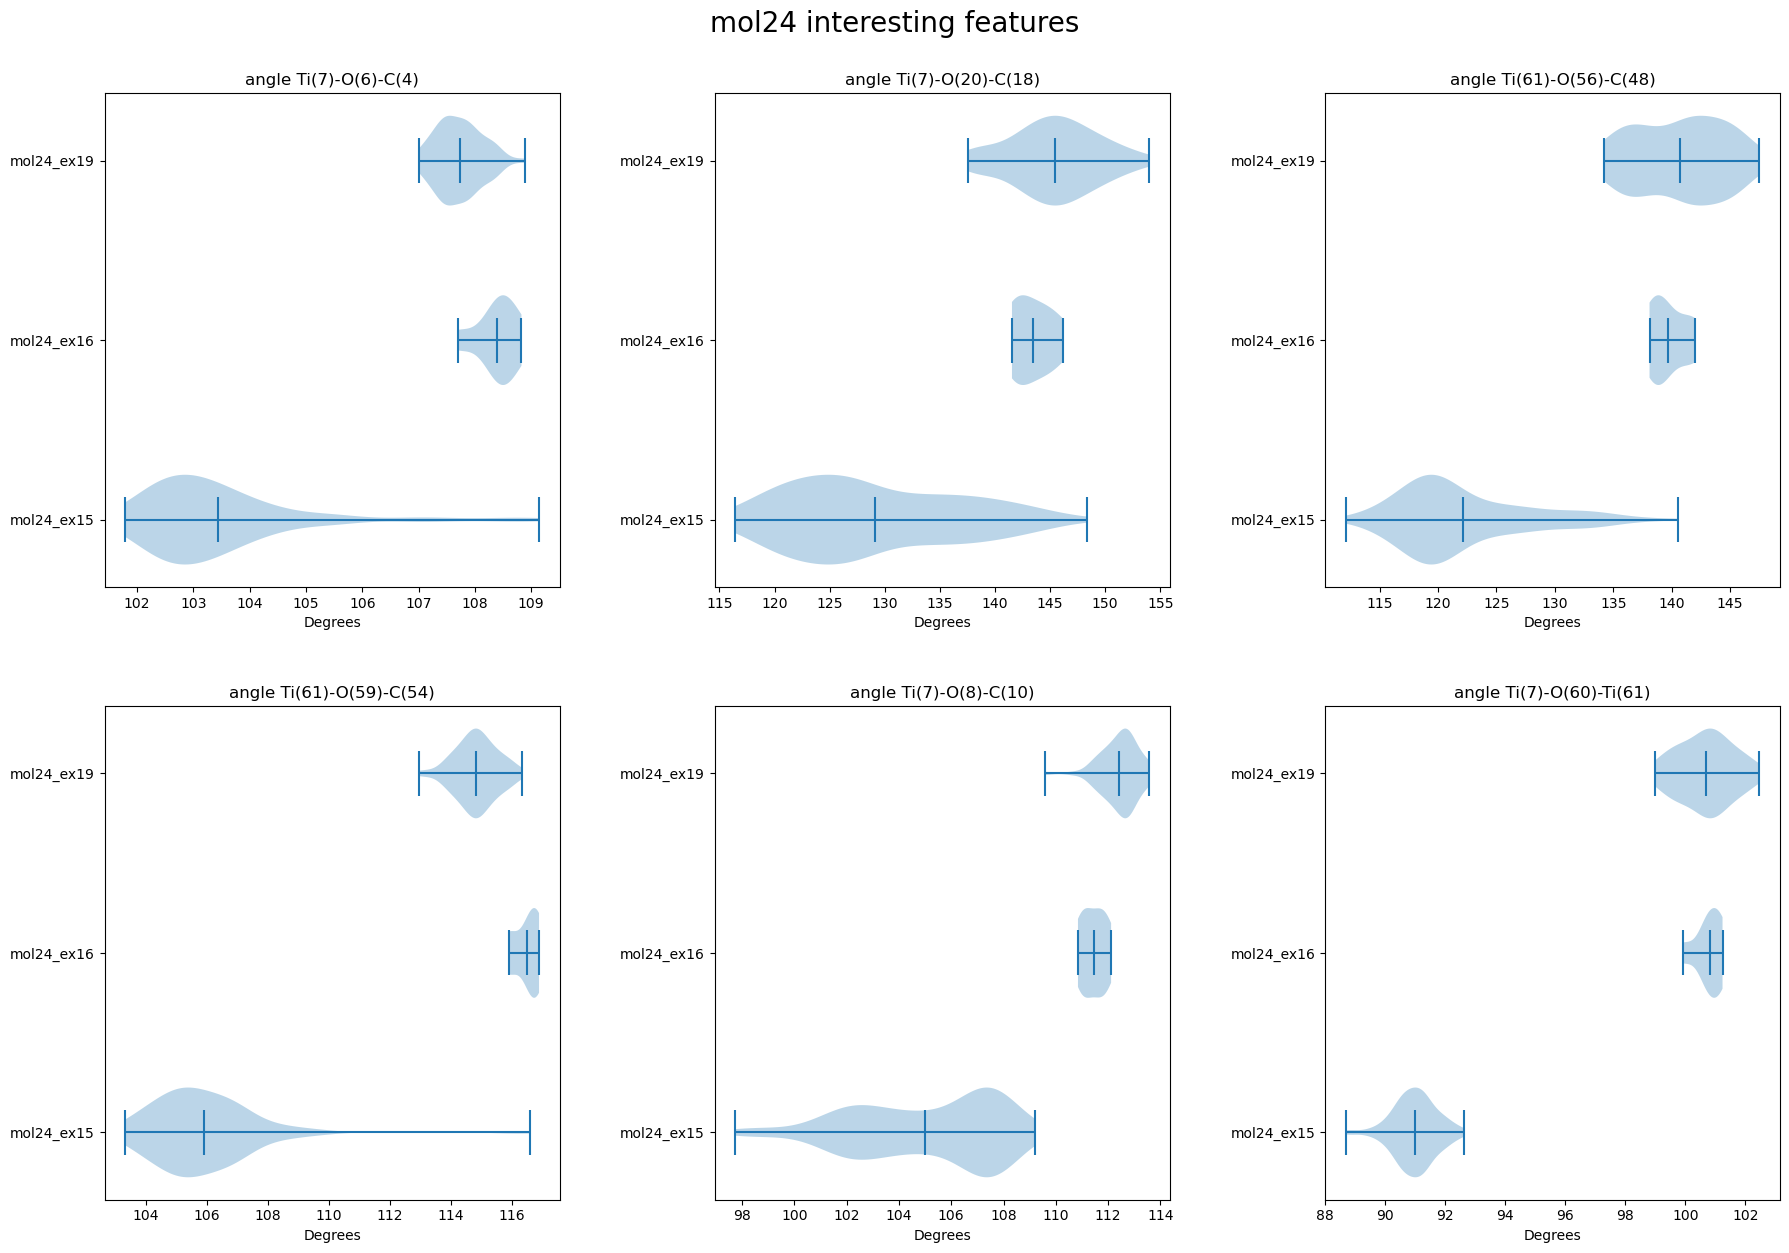

In [47]:
dataset_list_results = crest_confs_results
dataset_names = crest_confs_dataset_names
features_list = mol24_interesting_features
y_ticks = [i + 1 for i in range(len(dataset_names))]
#y_tick_labels = y_ticks # dataset_names
y_tick_labels = [x[:10] for x in dataset_names]

n = len(features_list)
num_cols = 3
num_rows = n // num_cols if n % num_cols == 0 else n // num_cols + 1
figure_size = (num_cols * 6, num_rows * 6)

title = "mol24 interesting features"
_, axs = plt.subplots(num_rows, num_cols, figsize=figure_size)

for features_idx, (ft, ax) in enumerate(zip(features_list, axs.ravel())):
    plot_title = features_list[features_idx].label
    x_label = ft.get_units()
    data = [x["calc_by_features"][features_idx].values for x in dataset_list_results]

    ax.violinplot(
            data,
            y_ticks,
            points=400,
            showmeans=True,
            vert=False,
        );

    ax.set_title(plot_title)
    ax.set_xlabel(x_label)
    ax.set_yticks(y_ticks)
    ax.set_yticklabels(y_tick_labels)

plt.tight_layout(h_pad=4, w_pad=4)
plt.suptitle(title, fontsize=20, y=1.04)
plt.show()

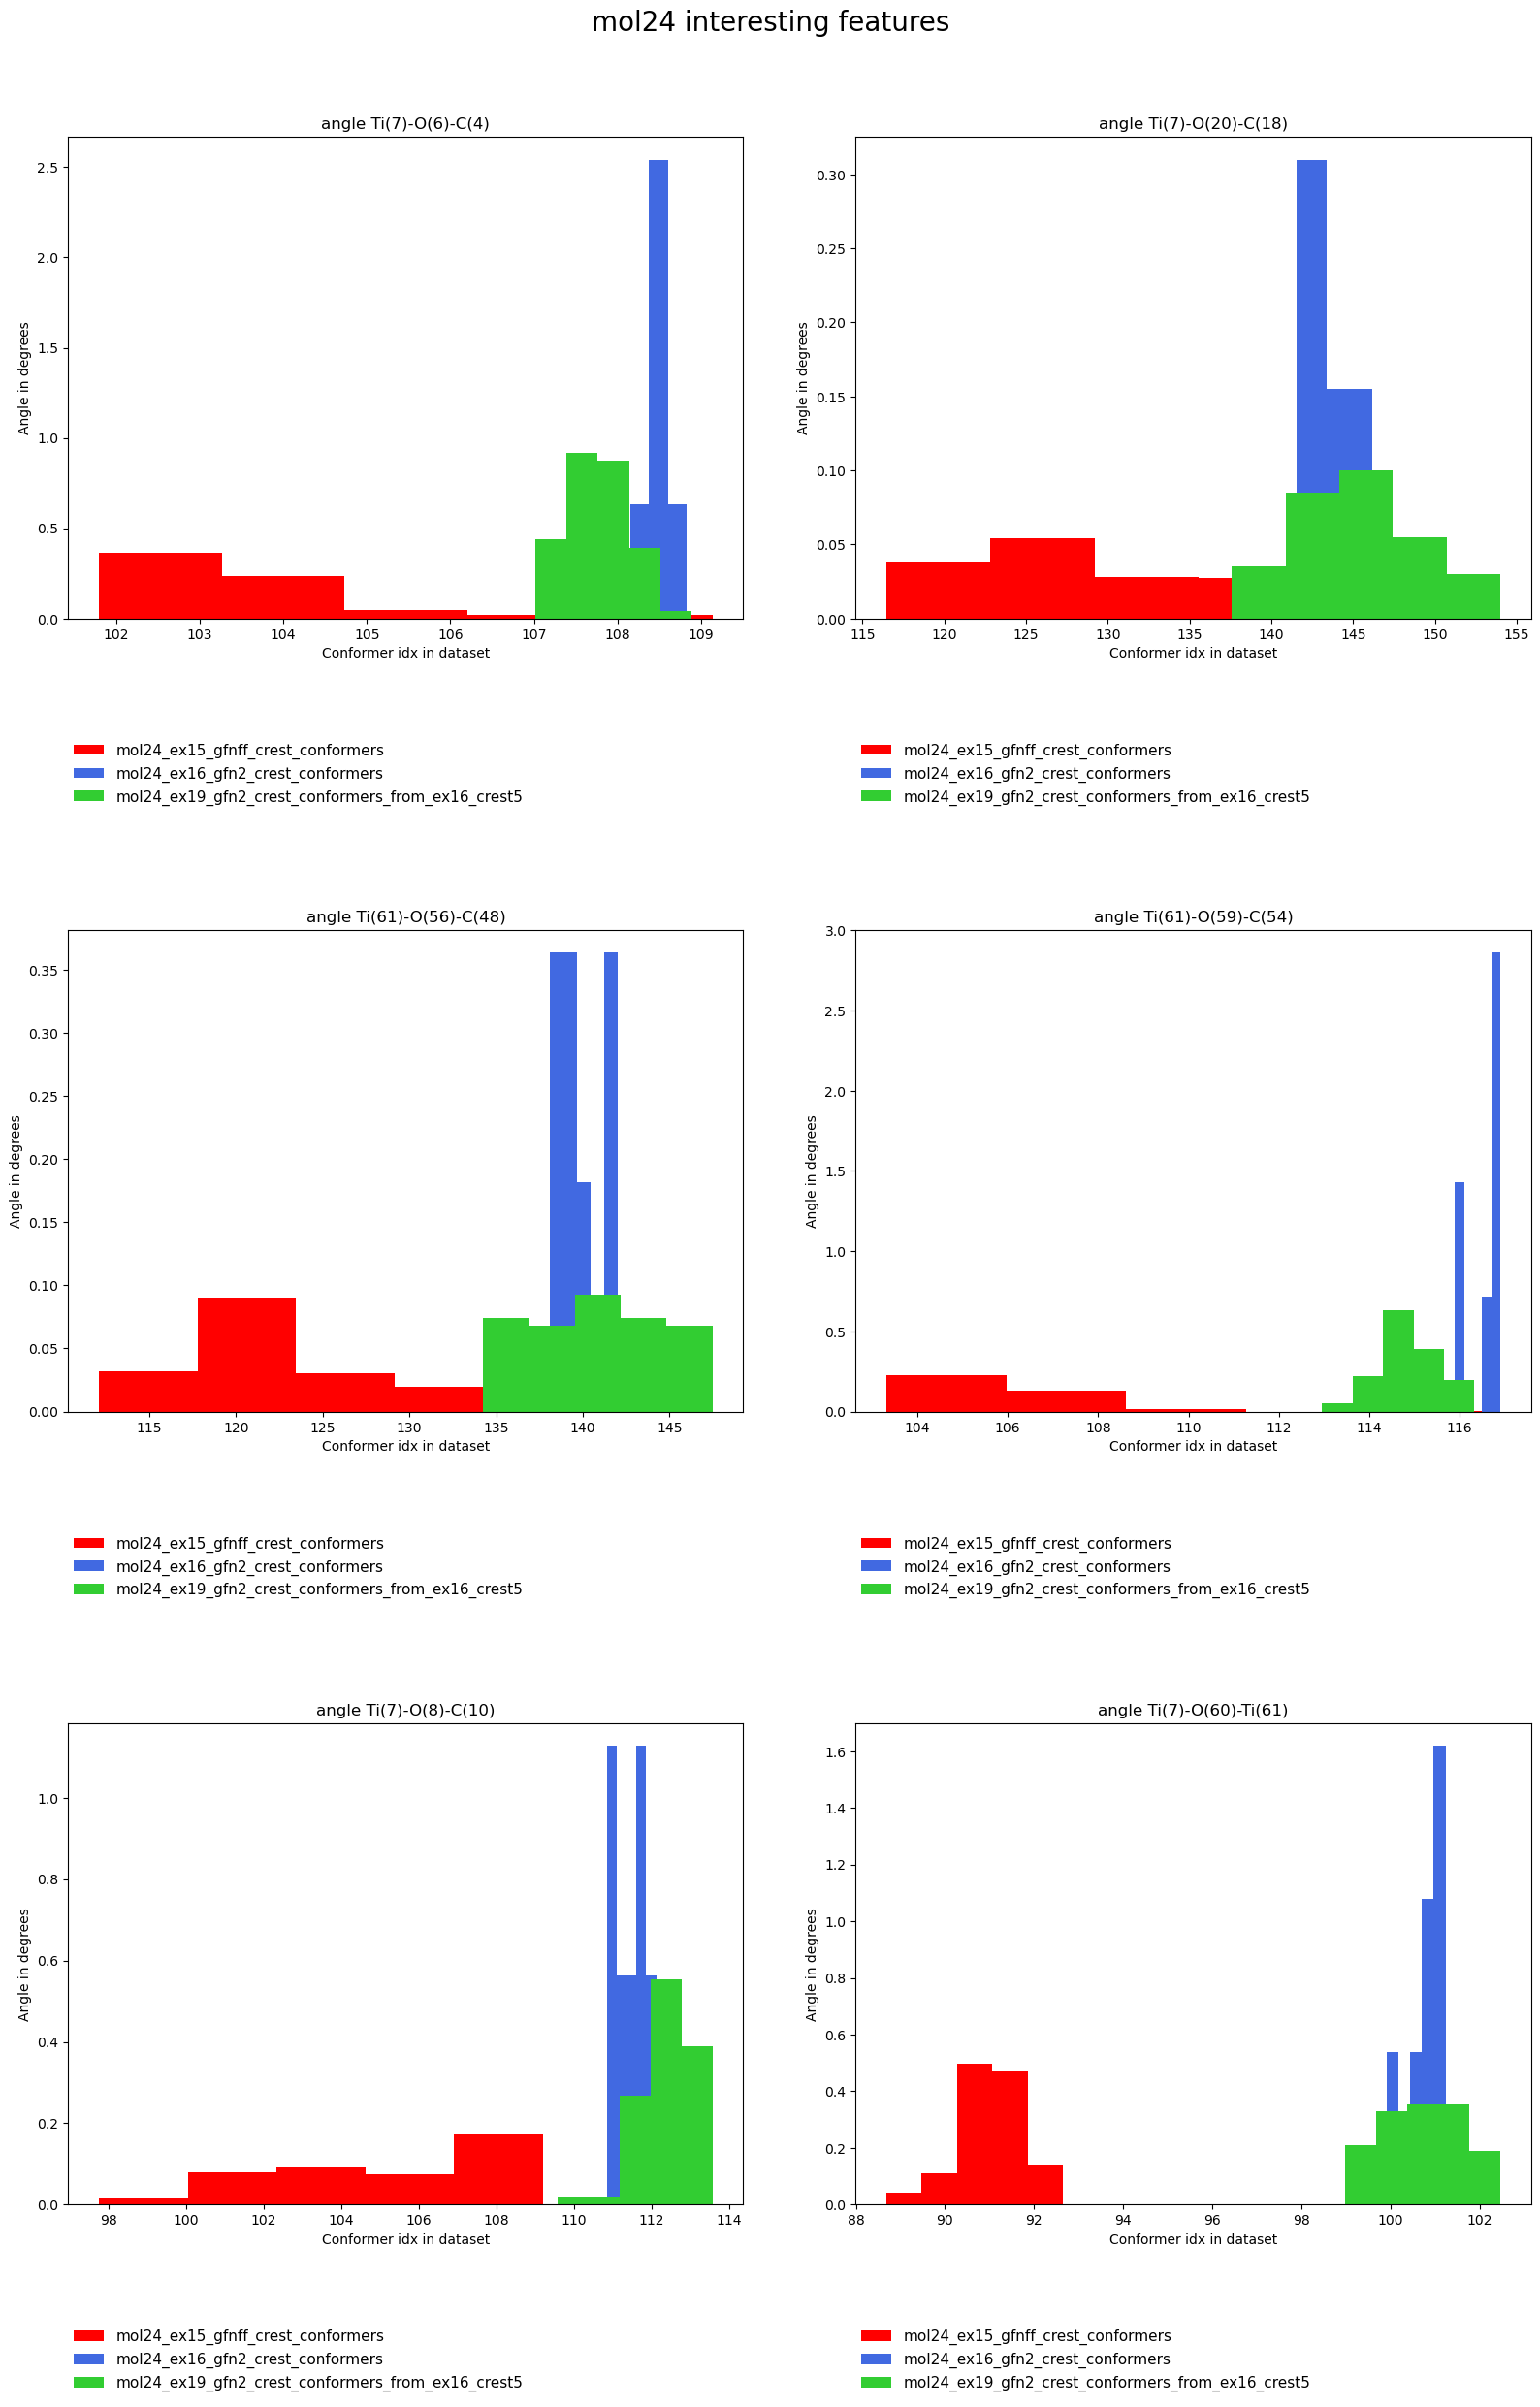

In [30]:
#https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.legend.html
# https://matplotlib.org/stable/gallery/color/named_colors.html

dataset_list_results = crest_confs_results
dataset_names = crest_confs_dataset_names
features_list = mol24_interesting_features

n = len(features_list)
num_cols = 2
num_rows = n // num_cols if n % num_cols == 0 else n // num_cols + 1
figure_size = (num_cols * 8, num_rows * 8)

title = "mol24 interesting features"
x_label = "Conformer idx in dataset"
y_label = "Angle in degrees"
num_bins = 5
_, axs = plt.subplots(num_rows, num_cols, figsize=figure_size)
start_idx = 0
for dset_idx, calcs in enumerate(dataset_list_results):
    for data, ax in zip(calcs["calc_by_features"], axs.ravel()):
        ax.hist(data.values, bins=num_bins, density=True, color=colours[dset_idx], label=dataset_names[dset_idx])
        #ax.scatter([start_idx + i + 1 for i, _ in enumerate(data.values)], data.values, s=12, c=colours[dset_idx], label=dataset_names[dset_idx])
        #ax.plot([start_idx + i + 1 for i, _ in enumerate(data.values)], data.values, c=colours[dset_idx], label=dataset_names[dset_idx])
        ax.set_title(data.name)
        ax.set_xlabel(x_label)
        ax.set_ylabel(y_label)
        #ax.legend(loc="upper left")
        ax.legend(loc=(0, -0.4), ncol=1, mode="expand", edgecolor="white", fontsize=11, markerscale=1.75)
    start_idx += len(data.values)

plt.tight_layout(h_pad=6, w_pad=4)
plt.suptitle(title, fontsize=20, y=1.04)
#plt.legend()
plt.show()

In [ ]:

dataset_list_results = crest_confs_results
dataset_names = crest_confs_dataset_names
features_list = mol24_interesting_features

n = len(features_list)
num_cols = 2
num_rows = n // num_cols if n % num_cols == 0 else n // num_cols + 1
figure_size = (num_cols * 8, num_rows * 8)

title = "mol24 interesting features"
x_label = "Conformer idx in dataset"
y_label = "Angle in degrees"
num_bins = 5
_, axs = plt.subplots(num_rows, num_cols, figsize=figure_size)
start_idx = 0
for dset_idx, calcs in enumerate(dataset_list_results):
    for data, ax in zip(calcs["calc_by_features"], axs.ravel()):
        ax.hist(data.values, bins=num_bins, density=True, color=colours[dset_idx], label=dataset_names[dset_idx])
        #ax.scatter([start_idx + i + 1 for i, _ in enumerate(data.values)], data.values, s=12, c=colours[dset_idx], label=dataset_names[dset_idx])
        #ax.plot([start_idx + i + 1 for i, _ in enumerate(data.values)], data.values, c=colours[dset_idx], label=dataset_names[dset_idx])
        ax.set_title(data.name)
        ax.set_xlabel(x_label)
        ax.set_ylabel(y_label)
        #ax.legend(loc="upper left")
        ax.legend(loc=(0, -0.4), ncol=1, mode="expand", edgecolor="white", fontsize=11, markerscale=1.75)
    start_idx += len(data.values)

plt.tight_layout(h_pad=6, w_pad=4)
plt.suptitle(title, fontsize=20, y=1.04)
#plt.legend()
plt.show()

In [32]:
dset_idx = 0
plot_title = dataset_list_results[dset_idx]["dataset_description"]
data = [x.values for x in dataset_list_results[dset_idx]["calc_by_features"]]
labels = [x.name for x in dataset_list_results[dset_idx]["calc_by_features"]]
user_medians = [np.mean(x) for x in data]

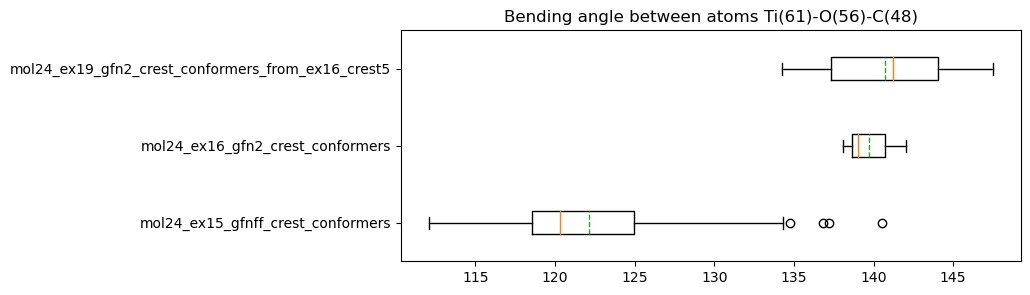

In [39]:
features_idx = 2
plot_title = dataset_list_results[0]["features_info"][features_idx]
data = [x["calc_by_features"][features_idx].values for x in dataset_list_results]
labels = [x["dataset_description"] for x in dataset_list_results]
user_medians = [np.mean(x) for x in data]

plt.figure(figsize=(8,len(labels) * 1))
plt.title(plot_title)
plt.boxplot(
              data,
              labels=labels,
              showmeans=True,
              meanline=True,
              vert=False,
              #usermedians=user_medians,
            );

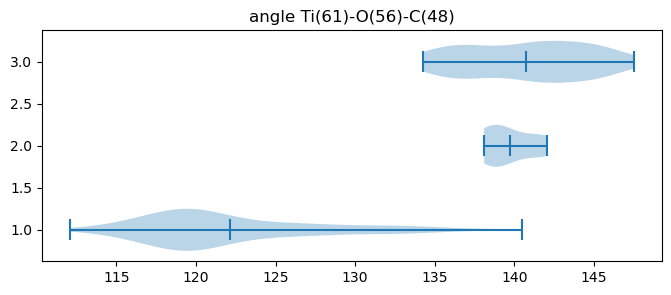

In [8]:
dataset_list_results = crest_confs_results
dataset_names = crest_confs_dataset_names
features_list = mol24_interesting_features

features_idx = 2
plot_title = features_list[features_idx].label
data = [x["calc_by_features"][features_idx].values for x in dataset_list_results]
user_medians = [np.mean(x) for x in data]

plt.figure(figsize=(8,len(dataset_names) * 1))
plt.title(plot_title)
plt.violinplot(
                data,
                [1,2,3],
                points=100,
                showmeans=True,
                vert=False,
            );